In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [73]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

# 심장병 예측 모델 만들기

## 데이터 불러오기

In [2]:
import pandas as pd
from sklearn import cluster
import seaborn as sns
from collections import Counter
df_heart = pd.read_csv("../data/heart_2020_cleaned.csv")
df_heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
df_heart.columns
# 'HeartDisease' : 심장병 유무
# 'BMI' : BMI 수치
# 'Smoking' : 흡연 여부
# 'AlcoholDrinking' : 음주 여부
# 'Stroke' : 뇌졸중 여부
# 'PhysicalHealth' : 신체적으로 건강하지 않았던 날 /한달
# 'MentalHealth' : 정신적으로 건강하지 않았던 날 /한달
# 'DiffWalking' : 보행 문제 여부
# 'Sex' : 성별
# 'AgeCategory' : 연령대
# 'Race' : 인종
# 'Diabetic' : 당뇨병 여부
# 'PhysicalActivity' : 30일 동안 신체활동 여부
#'GenHealth' : 주관적 건강 상태
#'SleepTime' : 평균 수면 시간
#'Asthma' : 천식
#'KidneyDisease' : 신장 질환
#'SkinCancer' : 피부암

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [4]:
df_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
df_heart.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


## 데이터 전처리

### 결측치 확인

In [6]:
df_heart.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### 이상치 확인 :BMI, PhysicalHealth, MentalHealth,SleepTime
- BMI의 경우, 계산 시 오류로 인해 수치가 비정상적으로 값이 높은 이상치가 생긴 것으로 판단
- 현실적으로 BMI가 60이 넘어가는 경우는 거의 없기 때문에 BMI의 값이 60 이상일 경우 이상치로 분류
- 이상치를 제거해도 전체적인 분포도에 변화가 없기 때문에 이상치 제거 선택
- Physical Helath, MentalHealth 는 X

#### BMI

In [7]:
df_heart["BMI"].sort_values(ascending=False)

126896    94.85
242834    94.66
104267    93.97
249715    93.86
156093    92.53
          ...  
81754     12.16
51637     12.13
113373    12.08
69662     12.02
205511    12.02
Name: BMI, Length: 319795, dtype: float64

<Axes: ylabel='BMI'>

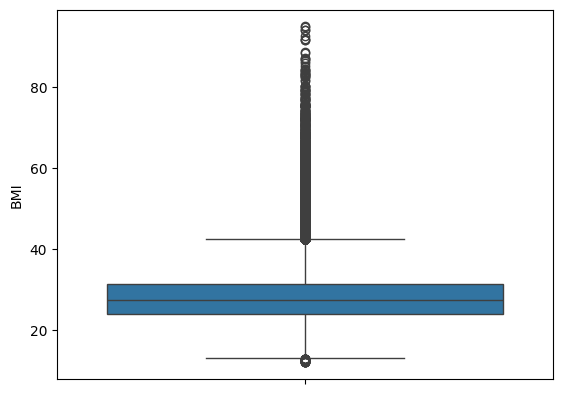

In [8]:
sns.boxplot(df_heart["BMI"])

In [9]:
# BMI 이상치 제거 전 범주형 데이터 분포도
df_heart.describe(include='object').loc['freq',:]/df_heart.describe(include='object').loc['count',:]

HeartDisease        0.914405
Smoking             0.587523
AlcoholDrinking     0.931903
Stroke               0.96226
DiffWalking          0.86113
Sex                 0.524727
AgeCategory          0.10679
Race                0.766779
Diabetic            0.843206
PhysicalActivity    0.775362
GenHealth           0.356034
Asthma              0.865939
KidneyDisease       0.963167
SkinCancer          0.906756
dtype: object

In [10]:
# BMI 이상치 제거 후 범주형 데이터 분포도
df_heart.query("BMI<=60").describe(include='object').loc['freq',:]/df_heart.query("BMI<=60").describe(include='object').loc['count',:]

HeartDisease        0.914451
Smoking             0.587517
AlcoholDrinking     0.931895
Stroke              0.962287
DiffWalking         0.861743
Sex                 0.524539
AgeCategory         0.106867
Race                0.767108
Diabetic            0.843522
PhysicalActivity    0.775777
GenHealth           0.356408
Asthma              0.866212
KidneyDisease       0.963245
SkinCancer          0.906665
dtype: object

In [11]:
df_heart = df_heart.query("BMI<=60")
df_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319303.000000,319303.000000,319303.000000,319303.000000
mean,28.265504,3.361741,3.892134,7.097534
std,6.168596,7.938239,7.947626,1.434652
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.320000,0.000000,0.000000,7.000000
75%,31.380000,2.000000,3.000000,8.000000
max,59.970000,30.000000,30.000000,24.000000


#### Mental Health

In [12]:
df_heart["MentalHealth"].value_counts()

MentalHealth
0.0     205165
30.0     17294
2.0      16469
5.0      14127
10.0     10491
3.0      10449
15.0      9872
1.0       9278
7.0       5524
20.0      5417
4.0       5371
14.0      2042
25.0      1952
6.0       1505
8.0       1090
12.0       755
28.0       514
21.0       351
29.0       315
18.0       210
9.0        202
16.0       152
17.0       128
27.0       125
13.0       110
22.0        98
11.0        82
23.0        68
24.0        67
26.0        59
19.0        21
Name: count, dtype: int64

#### Physical Health

In [13]:
df_heart["PhysicalHealth"].value_counts()

PhysicalHealth
0.0     226372
30.0     19402
2.0      14860
1.0      10479
3.0       8600
5.0       7585
10.0      5443
15.0      4991
7.0       4616
4.0       4456
20.0      3200
14.0      2888
6.0       1269
25.0      1157
8.0        924
21.0       622
12.0       602
28.0       443
29.0       203
9.0        179
18.0       167
16.0       135
27.0       124
17.0       110
13.0        90
22.0        88
11.0        85
24.0        66
26.0        66
23.0        46
19.0        35
Name: count, dtype: int64

#### Sleep Time

In [14]:
df_heart["SleepTime"].value_counts()

SleepTime
7.0     97652
8.0     97492
6.0     66593
5.0     19130
9.0     16019
10.0     7785
4.0      7717
12.0     2195
3.0      1980
2.0       784
1.0       550
11.0      415
14.0      242
16.0      236
15.0      188
18.0       99
13.0       95
20.0       63
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: count, dtype: int64

In [15]:
df_heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### AgeCategory int로 변환

In [16]:
df_heart["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [17]:
df_heart.loc[:,'AgeCategory']=df_heart['AgeCategory'].str[:1]+"0"
df_heart.loc[:,'AgeCategory']=df_heart['AgeCategory'].astype("int")
df_heart["AgeCategory"].unique()

array([50, 80, 60, 70, 40, 10, 30, 20], dtype=object)

### Sex -> 1,0으로 변환

In [18]:
df_heart["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
    df_heart.loc[df_heart.loc[df_heart['Sex']=='Male'].index,"Sex"]=0
    df_heart.loc[df_heart.loc[df_heart['Sex']=='Female'].index,'Sex']=1
df_heart["Sex"].unique()

array([1, 0], dtype=object)

### Race Dtype 변경

In [20]:
df_heart["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [21]:
df_heart.loc[df_heart.loc[df_heart["Race"]=='White'].index,"Race"]=0
df_heart.loc[df_heart.loc[df_heart["Race"]=='Black'].index,"Race"]=1
df_heart.loc[df_heart.loc[df_heart["Race"]=='Asian'].index,"Race"]=2
df_heart.loc[df_heart.loc[df_heart["Race"]=='American Indian/Alaskan Native'].index,"Race"]=3
df_heart.loc[df_heart.loc[df_heart["Race"]=='Other'].index,"Race"]=4
df_heart.loc[df_heart.loc[df_heart["Race"]=='Hispanic'].index,"Race"]=5
df_heart["Race"].unique()

array([0, 1, 2, 3, 4, 5], dtype=object)

### GenHealth Dtype 변경

In [22]:
df_heart["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [23]:
df_heart.loc[df_heart.loc[df_heart["GenHealth"]=='Poor'].index,"GenHealth"]=0
df_heart.loc[df_heart.loc[df_heart["GenHealth"]=='Fair'].index,"GenHealth"]=1
df_heart.loc[df_heart.loc[df_heart["GenHealth"]=='Good'].index,"GenHealth"]=2
df_heart.loc[df_heart.loc[df_heart["GenHealth"]=='Very good'].index,"GenHealth"]=3
df_heart.loc[df_heart.loc[df_heart["GenHealth"]=='Excellent'].index,"GenHealth"]=4
df_heart["GenHealth"].unique()

array([3, 1, 2, 0, 4], dtype=object)

### Diabetic Dtype 변경
* 당뇨가 있었던 적이 있었는가에 대한 답변이기 때문에 Yes, Yes(during pregnancy)는 1, No, No, borderline diabetes는 0으로 분류함)

In [24]:
df_heart["Diabetic"].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [25]:
df_heart.loc[df_heart.loc[df_heart["Diabetic"]=="No"].index,"Diabetic"]=0
df_heart.loc[df_heart.loc[df_heart["Diabetic"]=='No, borderline diabetes'].index,"Diabetic"]=0
df_heart.loc[df_heart.loc[df_heart["Diabetic"]=="Yes"].index,"Diabetic"]=1
df_heart.loc[df_heart.loc[df_heart["Diabetic"]=='Yes (during pregnancy)'].index,"Diabetic"]=1
df_heart["Diabetic"].unique()

array([1, 0], dtype=object)

### Yes,No -> 1,0으로 변환

In [26]:
for i in list(df_heart.columns):
    df_heart.loc[df_heart.loc[df_heart[i]=='No'].index,i]=0
    df_heart.loc[df_heart.loc[df_heart[i]=='Yes'].index,i]=1

df_heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,50,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,60,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,70,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40,0,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60,5,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,30,5,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,40,5,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,20,5,0,0,2,12.0,0,0,0


### 수치형 데이터 범주형으로 분류

#### BMI
- 상대적인 비율에 따른 분류가 아닌 절대적인 값을 기준으로 분류하기 위해 세계보건기구를 기준으로 저체중, 정상, 과체중, 1단계 비만, 2단계 비만, 3단계 비만으로 분류함
- BMI는 저체중(X < 18.5), 정상,(18.5<= X < 25), 과체중(25<= X < 30), 1단계 비만(30 <= X < 35), 2단계 비만(35 <= X < 40), 3단계 비만(X >= 40)으로 나눔
- 저체중 : 0, 정상 : 1,과체중 : 2, 1단계 비만 : 3, 2단계 비만 : 4, 3단계 고도비만 : 5

In [27]:
df_heart.loc[df_heart.query("BMI <18.5").index,"BMI"] = 0
df_heart.loc[df_heart.query("18.5 <= BMI <25").index,"BMI"] = 1
df_heart.loc[df_heart.query("25 <= BMI <30").index,"BMI"] = 2
df_heart.loc[df_heart.query("30 <= BMI <35").index,"BMI"] = 3
df_heart.loc[df_heart.query("35 <= BMI <40").index,"BMI"] = 4
df_heart.loc[df_heart.query("BMI >= 40").index,"BMI"] = 5
df_heart["BMI"].value_counts()

BMI
2.0    114512
1.0     97331
3.0     61345
4.0     25112
5.0     15893
0.0      5110
Name: count, dtype: int64

#### 수면시간
- 상대적인 비율에 따른 분류가 아닌 절대적인 값을 기준으로 분류하기 위해 대한수면학회에서 제공한 적정 수면시간을 기준으로 수면 부족, 정상 수면, 수면 과다로 분류함
- 수면 시간은 수면 부족(X < 6), 정상 수면(6 <= X < 9), 수면 과다(X >= 9)로 나눔
- 수면 부족 : 0, 정상 수면 : 1, 수면 과다 : 2

In [28]:
df_heart.loc[df_heart.query("SleepTime <6").index,"SleepTime"] = 0
df_heart.loc[df_heart.query("6 <= SleepTime < 9").index,"SleepTime"] = 1
df_heart.loc[df_heart.query("9 <= SleepTime").index,"SleepTime"] = 2
df_heart["SleepTime"].value_counts()

SleepTime
1.0    261737
0.0     30161
2.0     27405
Name: count, dtype: int64

In [29]:
df_heart['BMI'].value_counts()[1.0]/df_heart['SleepTime'].value_counts().sum()

0.30482331829015075

#### PhysicalHealth, MentalHealth
* 한달 간 신체적, 정신적으로 상태가 좋지 않았다고 느낀 날이 몇일인지에 대한 데이터
* 주간적으로 본인이 느낀 건강 상태이므로 GenHealth와 동일하게 5개로 분류함(완벽함, 매우 좋음, 좋음, 보통, 나쁨)
* 완벽함(X < 2), 매우 좋음(2 <= X <5), 좋음(5 <= X <10), 보통(10 <= X <20), 나쁨(20 <= X)
* 완벽함 : 0, 매우 좋음 : 1, 좋음 : 2, 보통 : 3, 나쁨 : 4

In [30]:
df_heart.loc[df_heart.query("PhysicalHealth <2").index,'PhysicalHealth'] = 0
df_heart.loc[df_heart.query("2<=PhysicalHealth <5").index,'PhysicalHealth'] = 1 
df_heart.loc[df_heart.query("5<=PhysicalHealth <10").index,'PhysicalHealth'] =2 
df_heart.loc[df_heart.query("10<=PhysicalHealth <20").index,'PhysicalHealth'] = 3
df_heart.loc[df_heart.query("20<=PhysicalHealth").index,'PhysicalHealth'] = 4
df_heart['PhysicalHealth'].value_counts()

PhysicalHealth
0.0    236851
1.0     27916
4.0     25417
2.0     14573
3.0     14546
Name: count, dtype: int64

In [31]:
df_heart.loc[df_heart.query("MentalHealth <2").index,'MentalHealth'] = 0
df_heart.loc[df_heart.query("2<=MentalHealth <5").index,'MentalHealth'] = 1 
df_heart.loc[df_heart.query("5<=MentalHealth <10").index,'MentalHealth'] =2 
df_heart.loc[df_heart.query("10<=MentalHealth <20").index,'MentalHealth'] = 3
df_heart.loc[df_heart.query("20<=MentalHealth").index,'MentalHealth'] = 4
df_heart['MentalHealth'].value_counts()

MentalHealth
0.0    214443
1.0     32289
4.0     26260
3.0     23863
2.0     22448
Name: count, dtype: int64

## 분류 모델 만들기

### 분류 알고리즘 선택
#### 심장병의 유무를 분류하는 이진 분류이기 때문에 로지스틱 회귀를 선택함
* 로지스틱 회귀
  * 이진 분류와 다중 분류에 사용되는 선형 분류 모델
  * 로지스틱 함수를 사용하여 확률을 추정하고, 임계값에 따라 클래스를 할당
* 결정 트리 
  * 데이터를 분할해가면서 트리 기반의 분류 모델을 제작
  * 각 분할은 특성의 값을 기준으로 이루어지며, 트리의 깊이가 깊어질수록 복잡한 결정 경계를 형성 
* 랜덤 포레스트
  * 여러 개의 결정 트리를 앙상블하여 만든 분류 모델
  * 각 트리는 랜덤한 부분 데이터셋과 랜덤한 특성 부분집합을 사용하여 독립적으로 학습하고, 최종 예측은 트리들의 평균 또는 투표를 통해 결정
* 서포트 벡터 머신
  * 데이터를 고차원 공간으로 매핑하여 클래스를 분리하는 초평면을 찾는 분류 모델
  * 최대 마진을 가지는 초평면을 찾는 것이 목표이며, 커널 기법을 사용하여 비선형 분류 문제를 해결
* K-최근접 이웃
  * 새로운 데이터 포인트의 분류는 주변 K개의 이웃들의 클래스로 결정되는 분류 모델
  * 거리 측정 방법(예: 유클리디안 거리)을 사용하여 가장 가까운 이웃을 찾고, 다수결 투표를 통해 예측합니다.
* 나이브 베이즈
  *  베이즈 정리를 기반으로 하는 확률적 분류 모델
  *  특성 간의 독립성을 가정하며, 특성들의 조건부 확률을 계산하여 클래스를 예측

### 정형화 단계
- target과 feature 분리
- Imbalanced Data Sampling : Over Sampling-SMOTEENN
- train set과 test set 분리

#### target과 feature 분리

In [35]:
df_heart = df_heart.astype('int')

In [104]:
target = df_heart['HeartDisease']
features = df_heart.drop(columns=['HeartDisease'])
target.shape,features.shape

((319303,), (319303, 17))

#### Imbalanced Data Sampling : Over Sampling-SMOTEENN

In [80]:
from imblearn.combine import SMOTEENN
combineSampling = SMOTEENN(sampling_strategy=0.8)
feature_combine_sample, target_combine_sample=combineSampling.fit_resample(features, target)
feature_combine_sample.shape, target_combine_sample.shape

((321991, 17), (321991,))

#### train set과 test set 분리

In [90]:
from sklearn.model_selection import train_test_split
combine_features_train, combine_features_test, combine_target_train, combine_target_test = train_test_split(feature_combine_sample,target_combine_sample,test_size=0.3,random_state=2)
combine_features_train.shape,combine_features_test.shape,combine_target_train.shape,combine_target_test.shape

((225393, 17), (96598, 17), (225393,), (96598,))

### 모델 학습

#### hyper Parameter Tuning : X

In [116]:
from sklearn import linear_model
combine_logisticRegression=linear_model.LogisticRegression()

In [119]:
combine_logisticRegression.fit(combine_features_train, combine_target_train)

LogisticRegression()

In [120]:
combine_target_train_predict = combine_logisticRegression.predict(combine_features_train)

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(combine_target_train,combine_target_train_predict)

0.9102811533632367

In [122]:
combine_target_test_predict = combine_logisticRegression.predict(combine_features_test)

In [123]:
accuracy_score(combine_target_test,combine_target_test_predict)

0.9113439201639786

In [124]:
from sklearn.metrics import classification_report
print(classification_report(combine_target_train,combine_target_train_predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92    123932
           1       0.90      0.90      0.90    101461

    accuracy                           0.91    225393
   macro avg       0.91      0.91      0.91    225393
weighted avg       0.91      0.91      0.91    225393



#### Hyper Parameter Tunning : grid search

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

hyper_parameters = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': range(0,10),
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear', 'saga','newton-cg'],
    'max_iter' : range(2,10)
}

estimator_model = LogisticRegression()
grid_model = GridSearchCV(estimator_model, hyper_parameters, scoring='f1', cv=5)
grid_model

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': range(0, 10), 'class_weight': [None, 'balanced'],
                         'max_iter': range(2, 10),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga', 'newton-cg']},
             scoring='f1')

In [109]:
grid_model.fit(combine_features_train,combine_target_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': range(0, 10), 'class_weight': [None, 'balanced'],
                         'max_iter': range(2, 10),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga', 'newton-cg']},
             scoring='f1')

In [110]:
best_model = grid_model.best_estimator_
best_model

LogisticRegression(C=6, class_weight='balanced', max_iter=7, solver='liblinear')

In [125]:
combine_target_train_predict_grd = best_model.predict(combine_features_train)

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(combine_target_train,combine_target_train_predict_grd)

0.9119670974697528

In [133]:
combine_target_test_predict_grd = best_model.predict(combine_features_test)

In [134]:
accuracy_score(combine_target_test,combine_target_test_predict_grd)

0.9126482949957556

In [136]:
from sklearn.metrics import classification_report
print(classification_report(combine_target_test,combine_target_test_predict_grd))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     53023
           1       0.89      0.92      0.90     43575

    accuracy                           0.91     96598
   macro avg       0.91      0.91      0.91     96598
weighted avg       0.91      0.91      0.91     96598



### 평가

#### tunning 전
* 정밀도(0,1) : 0.92,0.90
* 재현율(0,1) : 0.92, 0.90
* f1-score(0,1) : 0.92,0.90
#### tunning 후
* 정밀도(0,1) : 0.93,0.89
* 재현율(0,1) : 0.91, 0.92
* f1-score(0,1) : 0.92,0.90

#### 결론 
* 다른 샘플링 기법을 사용했을 때보다 정밀도와 재현율, f1-score 모두 높아짐
* 하지만, hyper parameter tunning 시 수치가 약간 올라가거나 떨어짐
* 모델 성능을 더 올리려면 hyper parameter 를 좀 더 수정할 필요가 있음
